In [127]:
'''
CPSC 383, F24
Python code to create a MNIST model and test it with my own handwritten code

Author: Divyansh Rana, 30117089

'''
# Code reference - https://www.youtube.com/watch?v=9cPMFTwBdM4

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [125]:
# Organize the data into train and test with a ration of 6:1
train_images = train_images.reshape((60000,28,28,1)) # Reshape training images for CNN input (28x28 pixels with 1 channel)
train_images = train_images.astype('float32')/255.0 # Normalize pixel values to [0,1]

# Reshape test images similarly
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255.0

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [106]:
from keras import layers
from keras import models

# input_shape set for 28x28 grayscale images

# Define the CNN model architecture
model = models.Sequential()
# First Conv2D layer: 
# - Applies 32 filters of size 3x3 
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))

# First MaxPooling layer:
# - Reduces spatial dimensions by taking the max value in each 2x2 pool
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

# Flatten layer:
# - Converts the 3D output of the last Conv2D layer to 1D for the Dense layer input
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))

# - 10 units (one for each digit), with 'softmax' activation to output class probabilities
model.add(layers.Dense(10, activation= 'softmax'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_13 (Flatten)        (None, 576)             

In [128]:
# Compile the model with the chosen optimizer, loss function, and metric
# - optimizer: 'rmsprop' - useful for handling gradient updates efficiently
# - loss: 'categorical_crossentropy' is appropriate as it's a multi-class classification problem
# - metrics: we track 'accuracy' to assess the model’s performance on the test set
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [108]:
# Only trained for 5 epoch because of the size of the code
model.fit(train_images, train_labels, epochs=5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 14s 15ms/step - loss: 0.1689 - accuracy: 0.9474
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0459 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0330 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0250 - accuracy: 0.9921
Epoch 5/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0204 - accuracy: 0.9940


In [109]:
model.evaluate(test_images, test_labels)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0265 - accuracy: 0.9921


0.9921000003814697

In [122]:
import numpy as np
handwritten_digits = np.load("digits.npy")  

# The file had a default value of 255 whereas the model was trained on a default value of 0
handwritten_digits[handwritten_digits == 255] = 0

# reshaping the .npy file to be similar to the trained data
handwritten_digits = handwritten_digits.reshape(10, 28, 28, 1)  
handwritten_digits = handwritten_digits.astype("float32") / 255.0
predictions = []

# Fins the predictions for each 
for digit in handwritten_digits:
    # Model expects a batch, so expand dimension
    digit = np.expand_dims(digit,
                            axis=0)
    prediction = model.predict(digit)
    predictions.append(prediction[0])  # Append the prediction for each digit


for i, prediction in enumerate(predictions):
    print(f"Digit {i} Prediction: {prediction}")
    print(f"Model guessed: {np.argmax(prediction)} with probability {np.max(prediction)}")


Digit 0 Prediction: [0.01725948 0.18914796 0.13761461 0.00712941 0.2145356  0.01672461
 0.3823114  0.01438492 0.01005787 0.01083413]
Model guessed: 6 with probability 0.3823114037513733
Digit 1 Prediction: [0.28036496 0.0297006  0.6214276  0.00466022 0.00533219 0.00501492
 0.00510222 0.0306293  0.01377039 0.00399766]
Model guessed: 2 with probability 0.621427595615387
Digit 2 Prediction: [6.5690759e-03 5.5941564e-01 4.2684880e-01 4.2964239e-06 7.3451683e-04
 2.8626279e-03 1.3682568e-03 2.1885345e-03 5.9154931e-06 2.2640866e-06]
Model guessed: 1 with probability 0.5594156384468079
Digit 3 Prediction: [7.9996335e-06 1.9771733e-05 2.5881835e-05 9.9050444e-01 9.8605251e-06
 4.7777155e-03 3.6246641e-07 3.7267534e-03 5.6283458e-05 8.7085244e-04]
Model guessed: 3 with probability 0.9905044436454773
Digit 4 Prediction: [0.00428038 0.34956133 0.35656163 0.00973525 0.01353377 0.01397739
 0.01509404 0.23016185 0.00210788 0.00498657]
Model guessed: 2 with probability 0.3565616309642792
Digit 5 Pre

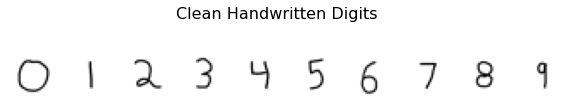

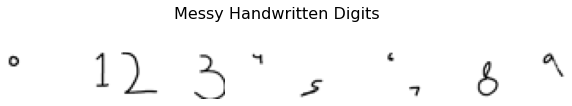

In [123]:
# Display the images for the report

import numpy as np
import matplotlib.pyplot as plt

# Load .npy files
clean_digits = np.load('step2_output/digits.npy')
messy_digits = np.load('part2_a2/digits.npy')

def display_digits(images, title, n=10):
    """
    Display the first n images in a grid.
    
    Args:
    images (numpy array): Array of images to display.
    title (str): Title of the display.
    n (int): Number of images to display. Defaults to 10.
    """
    plt.figure(figsize=(10, 2))
    plt.suptitle(title, fontsize=16)
    
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    
    plt.show()

# Display the first 10 images in each dataset
display_digits(clean_digits, 'Clean Handwritten Digits')
display_digits(messy_digits, 'Messy Handwritten Digits')
